In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
joint_uni = pd.read_csv('outputs/uni_area/joint-waiting-queue/joint-waiting-queue_conn0_ep10.csv')[['step','system_total_stopped']]
joint_uni.set_index('step')
joint_7th = pd.read_csv('outputs/7th-area/joint-waiting-queue/joint-waiting-queue_conn0_ep6.csv')[['step','system_total_stopped']]
joint_7th.set_index('step')

,system_total_stopped
step,
0.0,0
5.0,1
10.0,1
15.0,0
20.0,0
...,...
5980.0,0
5985.0,0
5990.0,0


In [11]:
queue_uni = pd.read_csv('outputs/uni_area/queue/queue_conn3_ep10.csv')[['step','system_total_stopped']]
queue_uni.set_index('step')
queue_7th = pd.read_csv('outputs/7th-area/queue/queue_conn1_ep2.csv')[['step','system_total_stopped']]
queue_7th.set_index('step')

,system_total_stopped
step,
0.0,0
5.0,1
10.0,1
15.0,0
20.0,0
...,...
5980.0,0
5985.0,0
5990.0,0


In [12]:
diff_uni = pd.read_csv('outputs/uni_area/diff-waiting-time/diff-waiting-time_conn1_ep10.csv')[['step','system_total_stopped']]
diff_uni.set_index('step')
diff_7th = pd.read_csv('outputs/7th-area/diff-waiting-time/diff-waiting-time_conn0_ep4.csv')[['step','system_total_stopped']]
diff_7th.set_index('step')

,system_total_stopped
step,
0.0,0
5.0,1
10.0,1
15.0,0
20.0,0
...,...
5980.0,0
5985.0,0
5990.0,0


In [13]:
pressure_uni = pd.read_csv('outputs/uni_area/pressure/pressure_conn4_ep9.csv')[['step','system_total_stopped']]
pressure_uni.set_index('step')
pressure_7th = pd.read_csv('outputs/7th-area/pressure/pressure_conn4_ep6.csv')[['step','system_total_stopped']]
pressure_7th.set_index('step')

,system_total_stopped
step,
0.0,0
5.0,1
10.0,1
15.0,0
20.0,0
...,...
5980.0,0
5985.0,0
5990.0,0


In [14]:
fixed_uni = pd.read_xml('nets/uni-area/fixed_time.xml')[['time','halting']]
fixed_uni.set_index('time')
fixed_7th = pd.read_xml('nets/7th-area/fixed_time.xml')[['time','halting']]
fixed_7th.set_index('time')

,halting
time,
0.0,1
1.0,0
2.0,0
3.0,1
4.0,1
...,...
4290.0,0
4291.0,0
4292.0,0


In [15]:
non_zero_pressure_7th = pressure_7th[pressure_7th['system_total_stopped'] != 0]
non_zero_fixed_7th = fixed_7th[fixed_7th['halting']!=0]
1-non_zero_pressure_7th['system_total_stopped'].mean()/non_zero_fixed_7th['halting'].mean()

0.8567929623378306

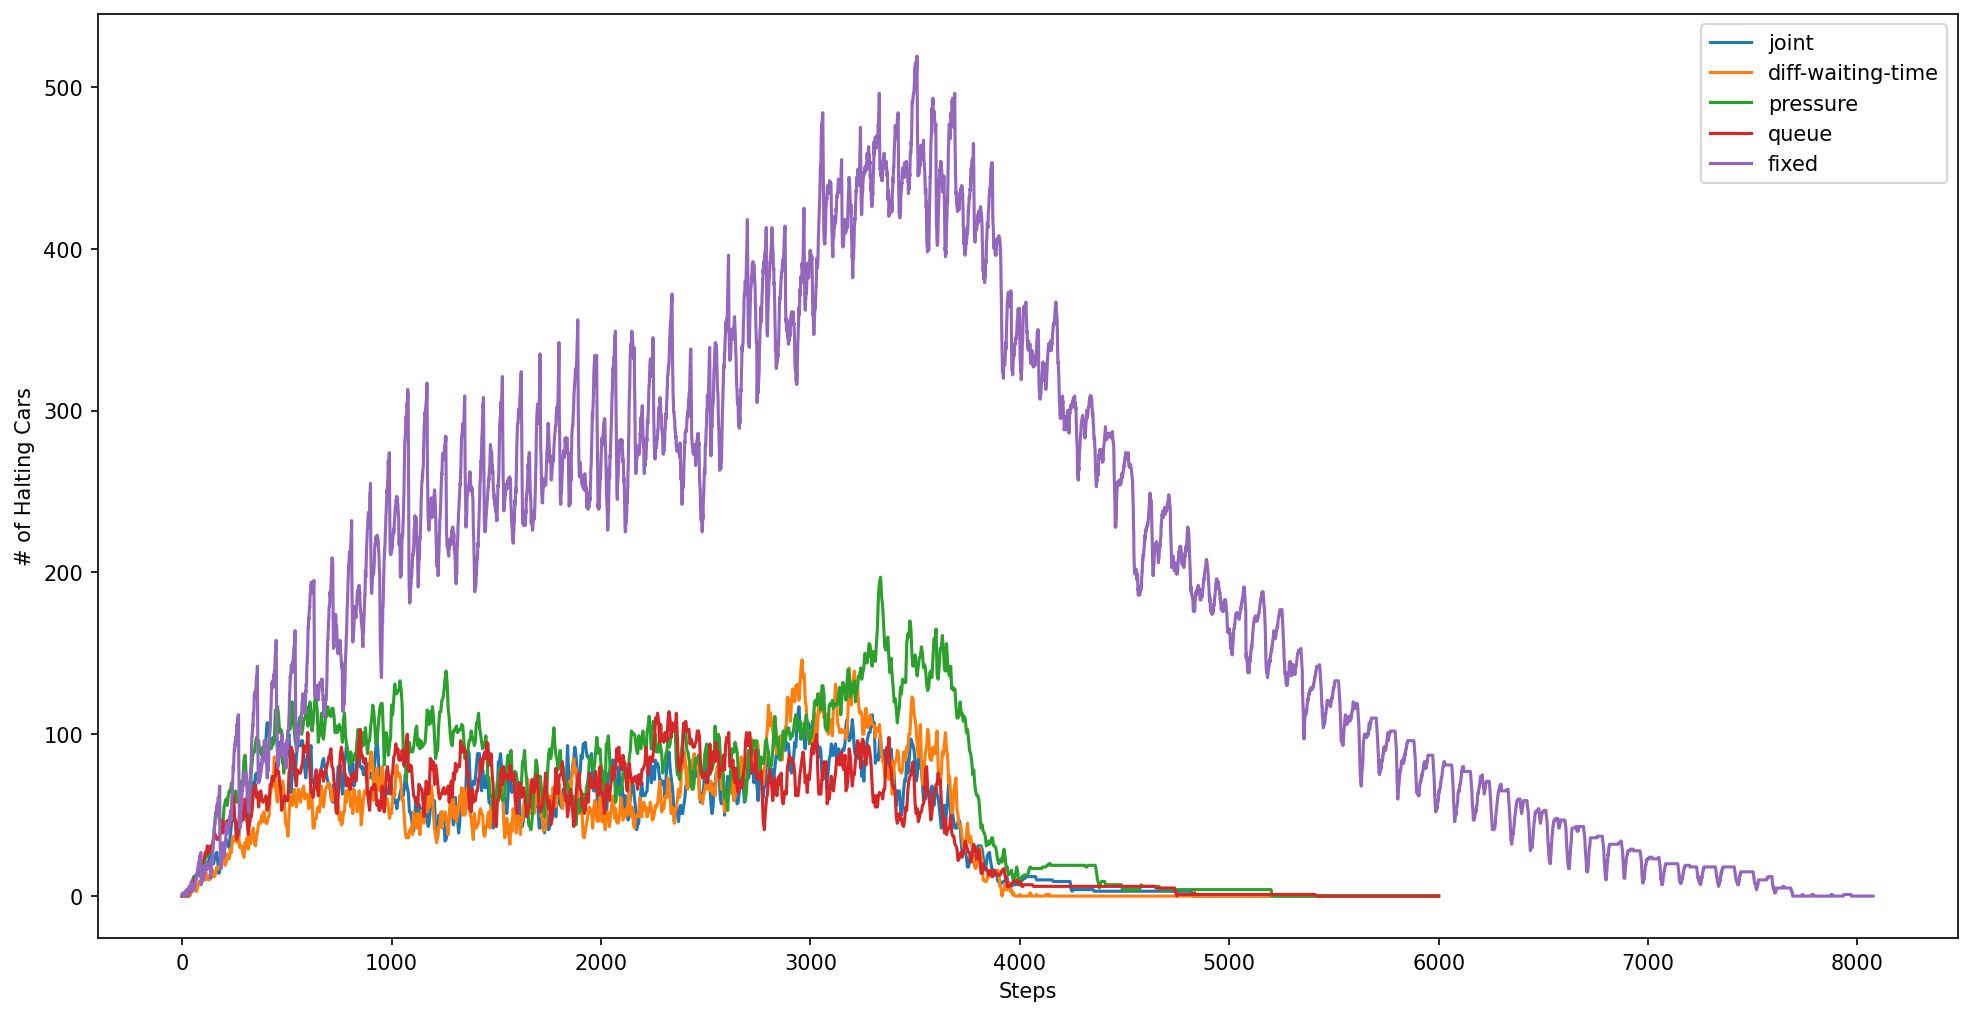

In [16]:
plt.figure(figsize=(16, 8), dpi=150)
plt.plot(joint_uni['step'],joint_uni['system_total_stopped'], label='joint')
plt.plot(diff_uni['step'],diff_uni['system_total_stopped'], label='diff-waiting-time')
plt.plot(pressure_uni['step'],pressure_uni['system_total_stopped'], label='pressure')
plt.plot(queue_uni['step'],queue_uni['system_total_stopped'], label='queue')
plt.plot(fixed_uni['time'], fixed_uni['halting'], label='fixed')
plt.xlabel('Steps')
plt.ylabel('# of Halting Cars')
plt.legend()

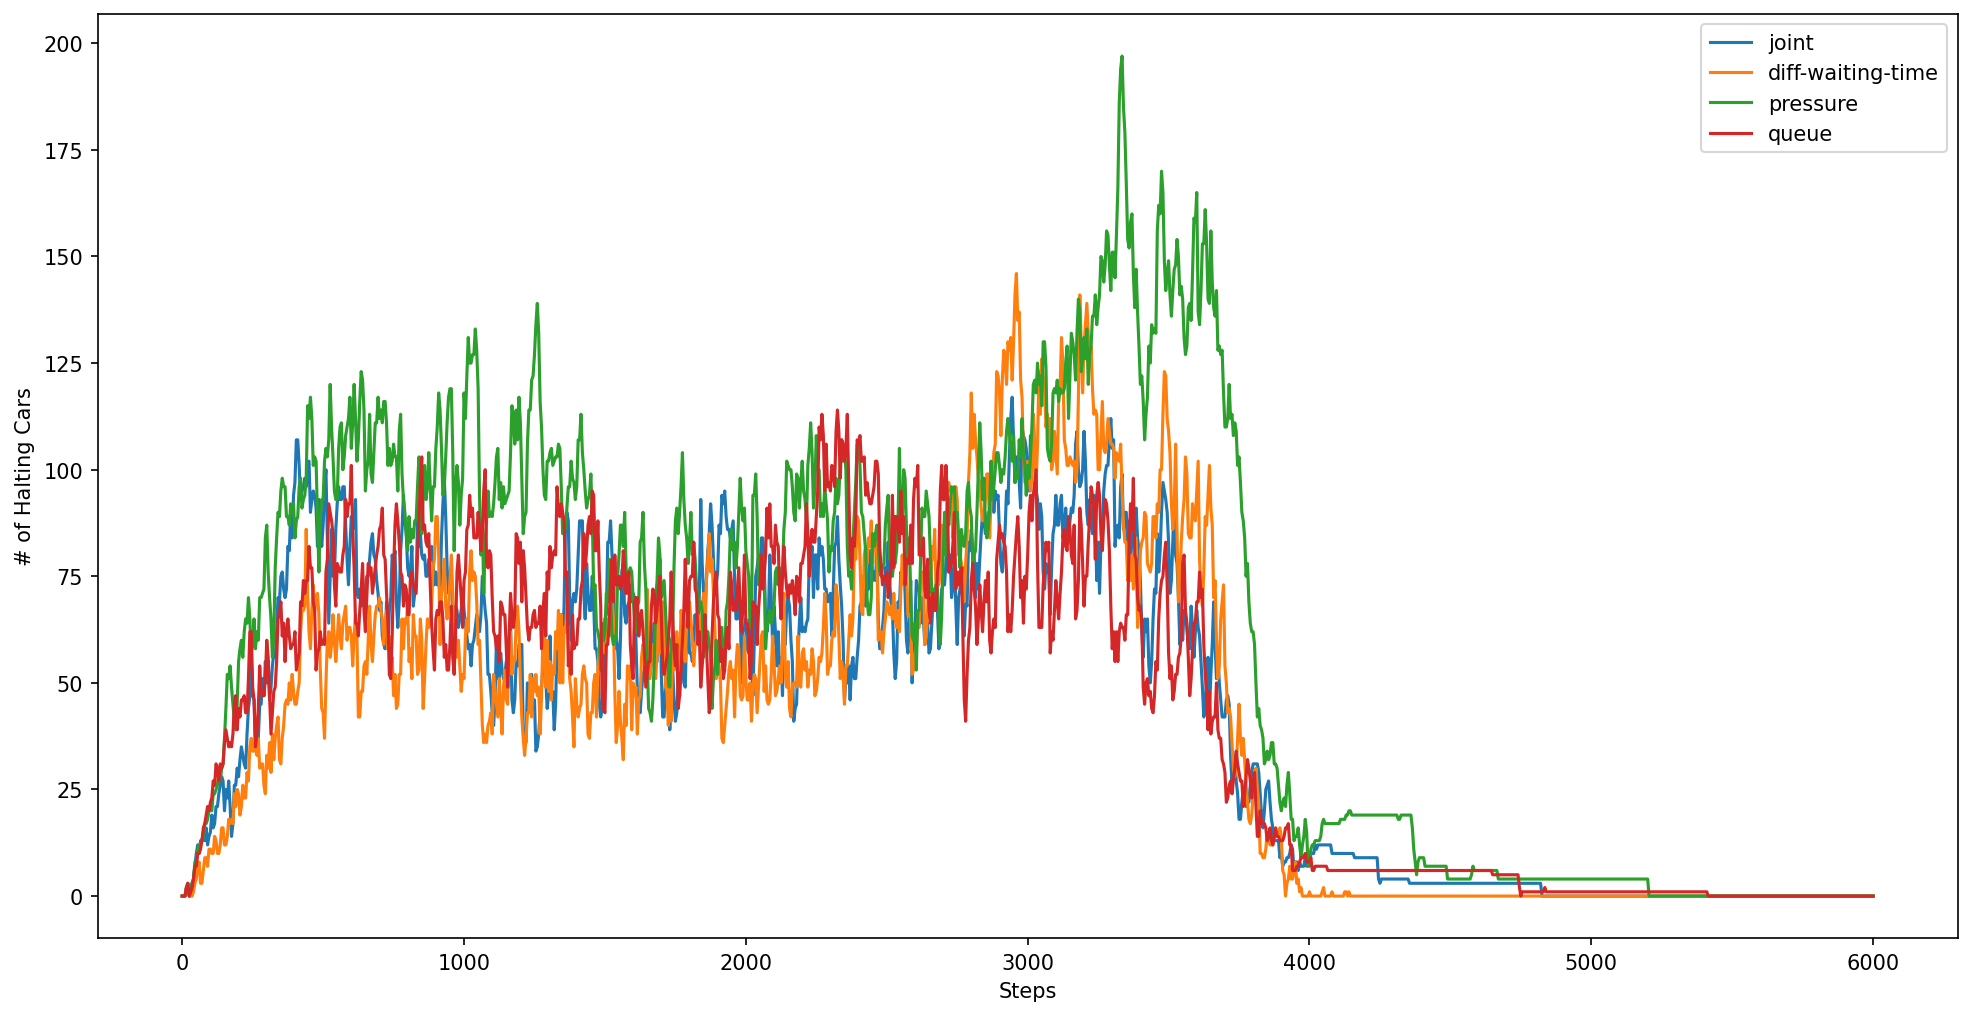

In [29]:
plt.figure(figsize=(16, 8), dpi=150)
plt.plot(joint_uni['step'],joint_uni['system_total_stopped'], label='joint')
plt.plot(diff_uni['step'],diff_uni['system_total_stopped'], label='diff-waiting-time')
plt.plot(pressure_uni['step'],pressure_uni['system_total_stopped'], label='pressure')
plt.plot(queue_uni['step'],queue_uni['system_total_stopped'], label='queue')
# plt.plot(fixed_uni['time'], fixed_uni['halting'], label='fixed')
plt.xlabel('Steps')
plt.ylabel('# of Halting Cars')
plt.legend()

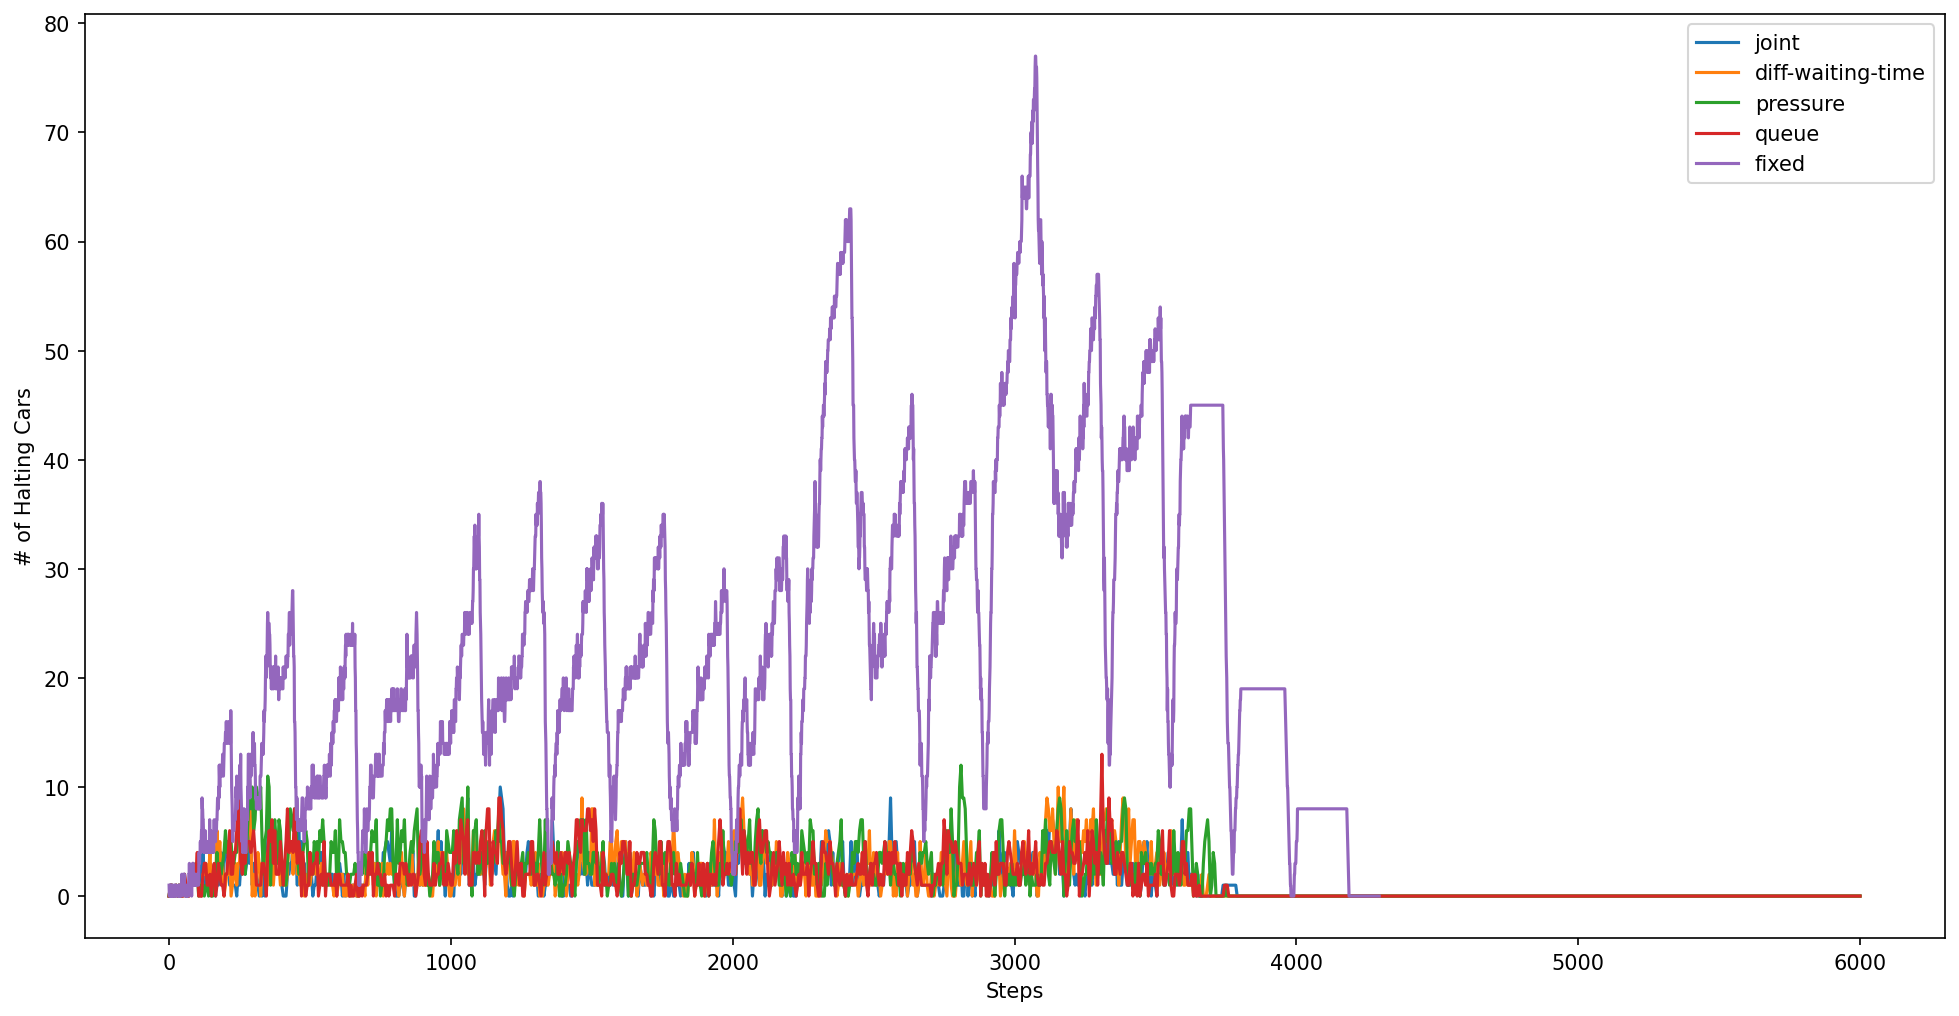

In [11]:
plt.figure(figsize=(16, 8), dpi=150)
plt.plot(joint_7th['step'],joint_7th['system_total_stopped'], label='joint')
plt.plot(diff_7th['step'],diff_7th['system_total_stopped'], label='diff-waiting-time')
plt.plot(pressure_7th['step'],pressure_7th['system_total_stopped'], label='pressure')
plt.plot(queue_7th['step'],queue_7th['system_total_stopped'], label='queue')
plt.plot(fixed_7th['time'], fixed_7th['halting'], label='fixed')
plt.xlabel('Steps')
plt.ylabel('# of Halting Cars')
plt.legend()